In [1]:
import pandas as pd, numpy as np, textblob

In [2]:
#bring in and combine files
reviews_1 = pd.read_csv('../data/target_full_reviews_1.csv')
reviews_2 = pd.read_csv('../data/target_full_reviews_2.csv')
prods_1 = pd.read_csv('../data/target_full_prods_1.csv')
prods_2 = pd.read_csv('../data/target_full_prods_2.csv')

reviews = pd.concat([reviews_2,reviews_1])
products = pd.concat([prods_2,prods_1])

In [3]:
display(
    reviews.info(),products.info()
)

<class 'pandas.core.frame.DataFrame'>
Index: 14812 entries, 0 to 13271
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   url                   14812 non-null  object
 1   review_header         14797 non-null  object
 2   reviewer_name         14422 non-null  object
 3   review_content        14812 non-null  object
 4   review_star_rating    14812 non-null  int64 
 5   review_helpful_votes  14812 non-null  int64 
 6   verified_purchaser    532 non-null    object
dtypes: int64(2), object(5)
memory usage: 925.8+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, 0 to 15
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   url                20 non-null     object 
 1   product_title      20 non-null     object 
 2   product_details    19 non-null     object 
 3   product_specs      0 non-null      float64
 4   produ

None

None

In [4]:
data_coll_mast = pd.read_excel('../data/Data Collection.xlsx',sheet_name='productCollectionList')
data_coll_prod = pd.read_excel('../data/Data Collection.xlsx',sheet_name='productDataCapture')
data_coll_rev = pd.read_excel('../data/Data Collection.xlsx',sheet_name='reviewDataCapture')
display(
    data_coll_mast.info(),data_coll_prod.info(),data_coll_rev.info()
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          20 non-null     float64
 1   product     33 non-null     object 
 2   Unnamed: 2  1 non-null      object 
 3   category    37 non-null     object 
dtypes: float64(1), object(3)
memory usage: 2.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   productID          50 non-null     float64
 1   prodSiteID         50 non-null     object 
 2   site               71 non-null     object 
 3   URL                60 non-null     object 
 4   product_master     44 non-null     object 
 5   product_title      40 non-null     object 
 6   product_details    23 non-null     object 
 7   product_specs      38 non-null     object 
 8   total_star_r

None

None

None

In [5]:
reviews

,url,review_header,reviewer_name,review_content,review_star_rating,review_helpful_votes,verified_purchaser
0,https://www.target.com/p/apple-iphone-14/-/A-8...,Help with the nightmare situation.,J Fosko,When I got the phone we did not want the phone...,3,0,NaN
1,https://www.target.com/p/apple-iphone-14/-/A-8...,Loving it!,Nanner74,I am new to iPhones but I am loving the easy u...,5,0,NaN
2,https://www.target.com/p/apple-iphone-14/-/A-8...,Nice phone,Brandi R,My daughter really likes her new phone.,5,0,NaN
3,https://www.target.com/p/apple-iphone-14/-/A-8...,Apple Iphone 14 purchase,Larry Justin,The Apple Iphone 14 is well worth the price. E...,5,0,NaN
4,https://www.target.com/p/apple-iphone-14/-/A-8...,Happy,Momo3boys,It’s pretty good no different then the 13,5,0,NaN
...,...,...,...,...,...,...,...
13267,https://www.target.com/p/igloo-imx-24qt-cooler...,"Nice cooler for the price,",Eric S.,"Nice cooler for the price, keeps my goodies ni...",5,0,NaN
13268,https://www.target.com/p/igloo-imx-24qt-cooler...,Awesome IMX,NaN,I purchased this cooler thinking if it didn’t ...,5,0,NaN
13269,https://www.target.com/p/igloo-imx-24qt-cooler...,Great cooler,NaN,This cooler works amazing! Only downfall is it...,4,0,NaN
13270,https://www.target.com/p/igloo-imx-24qt-cooler...,Great cooler,NaN,I’ll put this cooler up against any of those h...,5,0,NaN


In [6]:
#set verified purchaser column to boolean
reviews['verified_purchaser'] = np.select(
    [reviews['verified_purchaser'].isna(),~reviews['verified_purchaser'].isna()],
    [False,True]
)


In [7]:
reviews['verified_purchaser'].value_counts()

verified_purchaser
0    14280
1      532
Name: count, dtype: int64

In [8]:
#merging the IDs from data collection conventions
reviews['productID'] = -1
reviews['prodSiteID'] = 'target-1'

reviews['productID'] = reviews.apply(lambda row: data_coll_prod[data_coll_prod['URL']==row['url']].iloc[0]['productID'],axis=1)
reviews['prodSiteID'] = reviews.apply(lambda row: data_coll_prod[data_coll_prod['URL']==row['url']].iloc[0]['prodSiteID'],axis=1)
# for i,row in reviews.iterrows():
#     lookup = data_coll_prod[data_coll_prod['URL']==row['url']].iloc[0]
#     print(row['url'],lookup['URL'],lookup['prodSiteID'])
    #print(len(lookup))
    #print(lookup['productID'])
    # reviews.loc[i,'productID']= 
    # reviews.loc[i,'prodSiteID'] = lookup['prodSiteID']
    #print(lookup)
# reviews['productID'] = data_coll_prod[data_coll_prod['URL']==reviews['url']]['productID']
reviews

,url,review_header,reviewer_name,review_content,review_star_rating,review_helpful_votes,verified_purchaser,productID,prodSiteID
0,https://www.target.com/p/apple-iphone-14/-/A-8...,Help with the nightmare situation.,J Fosko,When I got the phone we did not want the phone...,3,0,0,1.0,target1
1,https://www.target.com/p/apple-iphone-14/-/A-8...,Loving it!,Nanner74,I am new to iPhones but I am loving the easy u...,5,0,0,1.0,target1
2,https://www.target.com/p/apple-iphone-14/-/A-8...,Nice phone,Brandi R,My daughter really likes her new phone.,5,0,0,1.0,target1
3,https://www.target.com/p/apple-iphone-14/-/A-8...,Apple Iphone 14 purchase,Larry Justin,The Apple Iphone 14 is well worth the price. E...,5,0,0,1.0,target1
4,https://www.target.com/p/apple-iphone-14/-/A-8...,Happy,Momo3boys,It’s pretty good no different then the 13,5,0,0,1.0,target1
...,...,...,...,...,...,...,...,...,...
13267,https://www.target.com/p/igloo-imx-24qt-cooler...,"Nice cooler for the price,",Eric S.,"Nice cooler for the price, keeps my goodies ni...",5,0,0,19.0,target19
13268,https://www.target.com/p/igloo-imx-24qt-cooler...,Awesome IMX,NaN,I purchased this cooler thinking if it didn’t ...,5,0,0,19.0,target19
13269,https://www.target.com/p/igloo-imx-24qt-cooler...,Great cooler,NaN,This cooler works amazing! Only downfall is it...,4,0,0,19.0,target19
13270,https://www.target.com/p/igloo-imx-24qt-cooler...,Great cooler,NaN,I’ll put this cooler up against any of those h...,5,0,0,19.0,target19


In [9]:
#fix the review headers (blanks / NA to zero-length string)
reviews['review_header'] =  np.select(
    [reviews['review_header'].isna(),~reviews['review_header'].isna()],
    ['',reviews['review_header']]
)
reviews=reviews.reset_index()
reviews = reviews.drop(['index'],axis=1)
reviews

,url,review_header,reviewer_name,review_content,review_star_rating,review_helpful_votes,verified_purchaser,productID,prodSiteID
0,https://www.target.com/p/apple-iphone-14/-/A-8...,Help with the nightmare situation.,J Fosko,When I got the phone we did not want the phone...,3,0,0,1.0,target1
1,https://www.target.com/p/apple-iphone-14/-/A-8...,Loving it!,Nanner74,I am new to iPhones but I am loving the easy u...,5,0,0,1.0,target1
2,https://www.target.com/p/apple-iphone-14/-/A-8...,Nice phone,Brandi R,My daughter really likes her new phone.,5,0,0,1.0,target1
3,https://www.target.com/p/apple-iphone-14/-/A-8...,Apple Iphone 14 purchase,Larry Justin,The Apple Iphone 14 is well worth the price. E...,5,0,0,1.0,target1
4,https://www.target.com/p/apple-iphone-14/-/A-8...,Happy,Momo3boys,It’s pretty good no different then the 13,5,0,0,1.0,target1
...,...,...,...,...,...,...,...,...,...
14807,https://www.target.com/p/igloo-imx-24qt-cooler...,"Nice cooler for the price,",Eric S.,"Nice cooler for the price, keeps my goodies ni...",5,0,0,19.0,target19
14808,https://www.target.com/p/igloo-imx-24qt-cooler...,Awesome IMX,NaN,I purchased this cooler thinking if it didn’t ...,5,0,0,19.0,target19
14809,https://www.target.com/p/igloo-imx-24qt-cooler...,Great cooler,NaN,This cooler works amazing! Only downfall is it...,4,0,0,19.0,target19
14810,https://www.target.com/p/igloo-imx-24qt-cooler...,Great cooler,NaN,I’ll put this cooler up against any of those h...,5,0,0,19.0,target19


In [10]:
# import nltk.corpus
# english_vocab = set(w.lower() for w in nltk.corpus.words.words())

# def lang_dist(text):
#     text_vocab = set(w.lower() for w in text if w.lower().isalpha())
#     return text_vocab.difference(english_vocab)


# lang_dist('a mi me gusta la bibliotecha')

# reviews['english_review'] = reviews.apply(
#     lambda row: set(w.lower() for w in row['review_content'])
# )


In [11]:
from langdetect import detect


In [13]:
# reviews['review_lang'] = reviews.apply(
#     lambda row: detect(row['review_content']),axis=1
# )
# reviews['review_lang'].value_counts()

In [14]:
''.join([w.lower() if w.isalpha() else '' for w in reviews.iloc[337]['review_content']])

'i'

In [15]:
#detect lanaguages for reviews.
reviews['review_lang'] = ''
for i,row in reviews.iterrows():
    #print(i)
    #print(row)
    lang=None
    try:
        lang = detect(
            ''.join(w.lower() if w.isalpha else " " for w in row['review_content'])
        )
    except:
        lang = 'Unk'
    
    reviews.loc[i,'review_lang'] = lang

    #print(detect''.join(w.lower() if w.isalpha else " " for w in row['review_content']))
    # print(detect(
    #     ''.join(w.lower() if w.isalpha else " " for w in row['review_content'])
    # ))
    #print(detect(row['review_content']))
reviews

,url,review_header,reviewer_name,review_content,review_star_rating,review_helpful_votes,verified_purchaser,productID,prodSiteID,review_lang
0,https://www.target.com/p/apple-iphone-14/-/A-8...,Help with the nightmare situation.,J Fosko,When I got the phone we did not want the phone...,3,0,0,1.0,target1,en
1,https://www.target.com/p/apple-iphone-14/-/A-8...,Loving it!,Nanner74,I am new to iPhones but I am loving the easy u...,5,0,0,1.0,target1,en
2,https://www.target.com/p/apple-iphone-14/-/A-8...,Nice phone,Brandi R,My daughter really likes her new phone.,5,0,0,1.0,target1,en
3,https://www.target.com/p/apple-iphone-14/-/A-8...,Apple Iphone 14 purchase,Larry Justin,The Apple Iphone 14 is well worth the price. E...,5,0,0,1.0,target1,en
4,https://www.target.com/p/apple-iphone-14/-/A-8...,Happy,Momo3boys,It’s pretty good no different then the 13,5,0,0,1.0,target1,en
...,...,...,...,...,...,...,...,...,...,...
14807,https://www.target.com/p/igloo-imx-24qt-cooler...,"Nice cooler for the price,",Eric S.,"Nice cooler for the price, keeps my goodies ni...",5,0,0,19.0,target19,en
14808,https://www.target.com/p/igloo-imx-24qt-cooler...,Awesome IMX,NaN,I purchased this cooler thinking if it didn’t ...,5,0,0,19.0,target19,en
14809,https://www.target.com/p/igloo-imx-24qt-cooler...,Great cooler,NaN,This cooler works amazing! Only downfall is it...,4,0,0,19.0,target19,en
14810,https://www.target.com/p/igloo-imx-24qt-cooler...,Great cooler,NaN,I’ll put this cooler up against any of those h...,5,0,0,19.0,target19,en


In [46]:
#check languages
reviews['review_lang'].value_counts()
display(list(reviews[reviews['review_lang']!='en']['review_content']))

['Seems to get hot quick : (',
 'Good phone, no problems so far.',
 'A nice phone at a nice price. I like it!',
 'Amazing phone amazing price',
 'I love my phone apple rock',
 '👍🏻👍🏻👍🏻 I👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻',
 'none ................................',
 'Great device love it love',
 'great phone love it- big upgrade for me',
 'Great product!!!!!!!!!!!!!',
 'I like it I just haven’t got it started yet',
 'Just like my 13 but new lol..',
 'Great phone!! I have just upgraded',
 'Sold broken phone-no return',
 'Great phone!! I have just upgraded',
 'Sold broken phone-no return',
 'I love my Samsung S22 Ultra. Best phone yet!!!!!!!!',
 'Great printer',
 'Saves time',
 'Keeps printing blank pages',
 'Works good so far',
 'no documentation, cannot use',
 'Makes taxes easy. Imports all my important tax documents.',
 'Did not engage - nothing to add xxxxxxxxxxxxxxxxxx',
 'Nice Nice Nice Nice Nice Nice Nice Nice Nice Nice !!!',
 'easy to understandddddddddddddddddddddddddddddddddddd',
 'Installing in

In [17]:
reviews[reviews['review_lang']=='en']

,url,review_header,reviewer_name,review_content,review_star_rating,review_helpful_votes,verified_purchaser,productID,prodSiteID,review_lang
0,https://www.target.com/p/apple-iphone-14/-/A-8...,Help with the nightmare situation.,J Fosko,When I got the phone we did not want the phone...,3,0,0,1.0,target1,en
1,https://www.target.com/p/apple-iphone-14/-/A-8...,Loving it!,Nanner74,I am new to iPhones but I am loving the easy u...,5,0,0,1.0,target1,en
2,https://www.target.com/p/apple-iphone-14/-/A-8...,Nice phone,Brandi R,My daughter really likes her new phone.,5,0,0,1.0,target1,en
3,https://www.target.com/p/apple-iphone-14/-/A-8...,Apple Iphone 14 purchase,Larry Justin,The Apple Iphone 14 is well worth the price. E...,5,0,0,1.0,target1,en
4,https://www.target.com/p/apple-iphone-14/-/A-8...,Happy,Momo3boys,It’s pretty good no different then the 13,5,0,0,1.0,target1,en
...,...,...,...,...,...,...,...,...,...,...
14807,https://www.target.com/p/igloo-imx-24qt-cooler...,"Nice cooler for the price,",Eric S.,"Nice cooler for the price, keeps my goodies ni...",5,0,0,19.0,target19,en
14808,https://www.target.com/p/igloo-imx-24qt-cooler...,Awesome IMX,NaN,I purchased this cooler thinking if it didn’t ...,5,0,0,19.0,target19,en
14809,https://www.target.com/p/igloo-imx-24qt-cooler...,Great cooler,NaN,This cooler works amazing! Only downfall is it...,4,0,0,19.0,target19,en
14810,https://www.target.com/p/igloo-imx-24qt-cooler...,Great cooler,NaN,I’ll put this cooler up against any of those h...,5,0,0,19.0,target19,en


In [18]:
#add polarity and subjectivity measures
reviews['review_polarity'] = reviews.apply(
    lambda row: textblob.TextBlob(row['review_header'] + " "+ row['review_content']).sentiment[0],axis=1
)
reviews['review_subjectivity'] = reviews.apply(
    lambda row: textblob.TextBlob(row['review_header'] + " " + row['review_content']).sentiment[1],axis=1
)

In [19]:
reviews

,url,review_header,reviewer_name,review_content,review_star_rating,review_helpful_votes,verified_purchaser,productID,prodSiteID,review_lang,review_polarity,review_subjectivity
0,https://www.target.com/p/apple-iphone-14/-/A-8...,Help with the nightmare situation.,J Fosko,When I got the phone we did not want the phone...,3,0,0,1.0,target1,en,0.375000,0.750000
1,https://www.target.com/p/apple-iphone-14/-/A-8...,Loving it!,Nanner74,I am new to iPhones but I am loving the easy u...,5,0,0,1.0,target1,en,0.403283,0.714646
2,https://www.target.com/p/apple-iphone-14/-/A-8...,Nice phone,Brandi R,My daughter really likes her new phone.,5,0,0,1.0,target1,en,0.312121,0.551515
3,https://www.target.com/p/apple-iphone-14/-/A-8...,Apple Iphone 14 purchase,Larry Justin,The Apple Iphone 14 is well worth the price. E...,5,0,0,1.0,target1,en,0.242424,0.396970
4,https://www.target.com/p/apple-iphone-14/-/A-8...,Happy,Momo3boys,It’s pretty good no different then the 13,5,0,0,1.0,target1,en,0.437500,0.800000
...,...,...,...,...,...,...,...,...,...,...,...,...
14807,https://www.target.com/p/igloo-imx-24qt-cooler...,"Nice cooler for the price,",Eric S.,"Nice cooler for the price, keeps my goodies ni...",5,0,0,19.0,target19,en,0.300000,1.000000
14808,https://www.target.com/p/igloo-imx-24qt-cooler...,Awesome IMX,NaN,I purchased this cooler thinking if it didn’t ...,5,0,0,19.0,target19,en,0.254861,0.700694
14809,https://www.target.com/p/igloo-imx-24qt-cooler...,Great cooler,NaN,This cooler works amazing! Only downfall is it...,4,0,0,19.0,target19,en,0.340625,0.787500
14810,https://www.target.com/p/igloo-imx-24qt-cooler...,Great cooler,NaN,I’ll put this cooler up against any of those h...,5,0,0,19.0,target19,en,0.410000,0.381667


In [20]:
reviews[reviews['review_lang']=='en'].describe().T

,count,mean,std,min,25%,50%,75%,max
review_star_rating,14536.0,4.475028,1.012170,1.0,4.000000,5.000000,5.000000,5.0
review_helpful_votes,14536.0,0.261695,1.773608,0.0,0.000000,0.000000,0.000000,63.0
verified_purchaser,14536.0,0.034948,0.183654,0.0,0.000000,0.000000,0.000000,1.0
productID,14536.0,8.728949,3.784004,1.0,6.000000,10.000000,11.000000,20.0
review_polarity,14536.0,0.340361,0.274110,-1.0,0.173333,0.351548,0.510000,1.0
review_subjectivity,14536.0,0.588223,0.194655,0.0,0.478571,0.600000,0.716667,1.0


<Axes: xlabel='review_polarity', ylabel='review_subjectivity'>

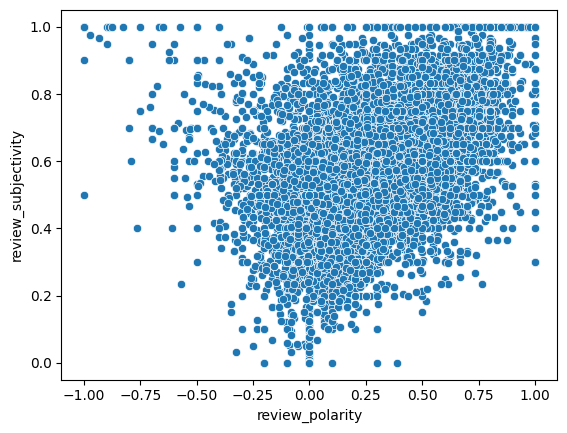

In [21]:
import seaborn as sns

sns.scatterplot(
    data=reviews,
    x='review_polarity',y='review_subjectivity'
)

<Axes: xlabel='review_polarity', ylabel='review_star_rating'>

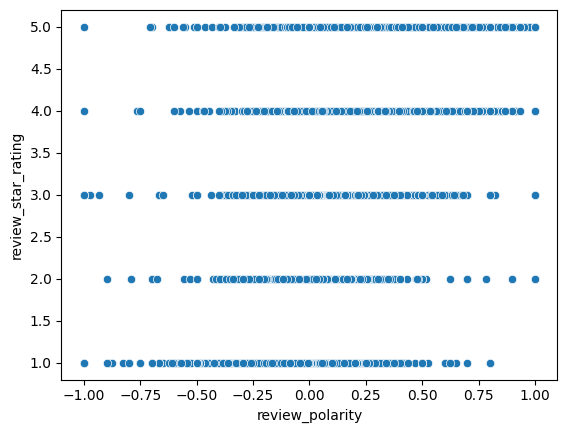

In [22]:
sns.scatterplot(
    data=reviews,x='review_polarity',y='review_star_rating'
)

<Axes: xlabel='review_polarity', ylabel='Density'>

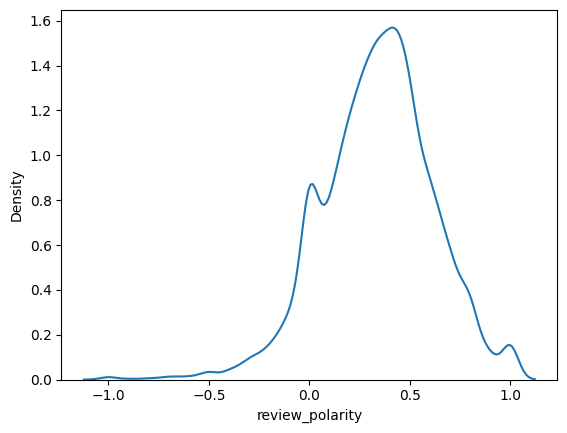

In [23]:
sns.kdeplot(
    data=reviews,
    x='review_polarity'
)

<Axes: xlabel='review_polarity', ylabel='Count'>

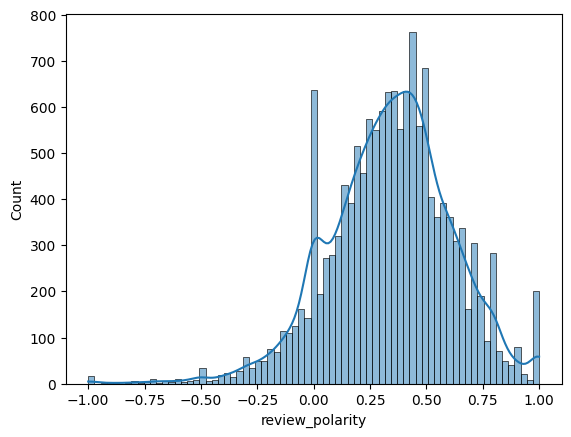

In [75]:
sns.histplot(
    data=reviews,
    x='review_polarity',kde=True
)

productID
6.0          133
11.0          84
10.0          45
1.0           19
12.0          15
2.0            7
8.0            7
3.0            5
17.0           4
19.0           4
9.0            2
13.0           2
15.0           1
18.0           1
20.0           1
Name: count, dtype: int64

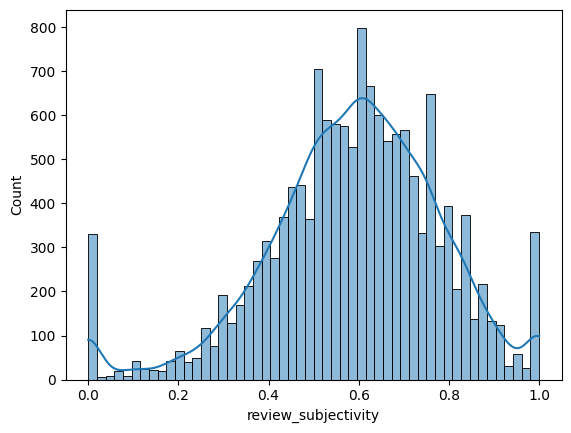

In [80]:
sns.histplot(
    data=reviews,
    x='review_subjectivity',kde=True
)
reviews[reviews['review_subjectivity'].isin([0])].sort_values(by='review_subjectivity').value_counts(subset=['productID'])

<Axes: xlabel='review_star_rating', ylabel='Density'>

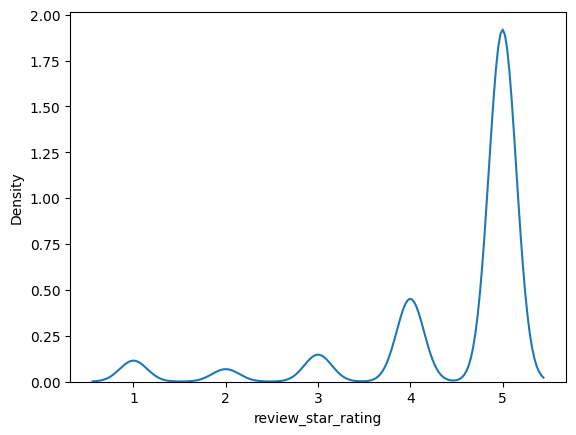

In [25]:
sns.kdeplot(
    data=reviews,
    x='review_star_rating'
)

<Axes: xlabel='review_star_rating', ylabel='review_polarity'>

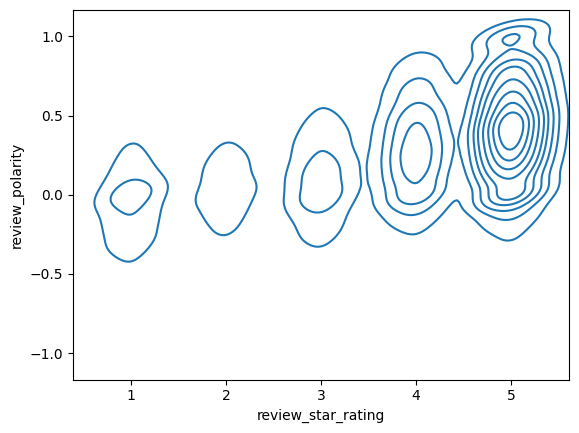

In [26]:
sns.kdeplot(
    data=reviews,x='review_star_rating',y='review_polarity'#,cbar=True
)

<Axes: xlabel='review_subjectivity', ylabel='review_polarity'>

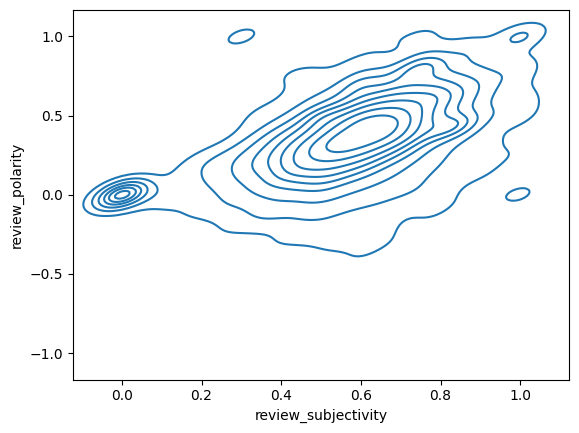

In [27]:
sns.kdeplot(
    data=reviews,x='review_subjectivity',y='review_polarity'#,cbar=True
)

<Axes: xlabel='review_star_rating', ylabel='review_subjectivity'>

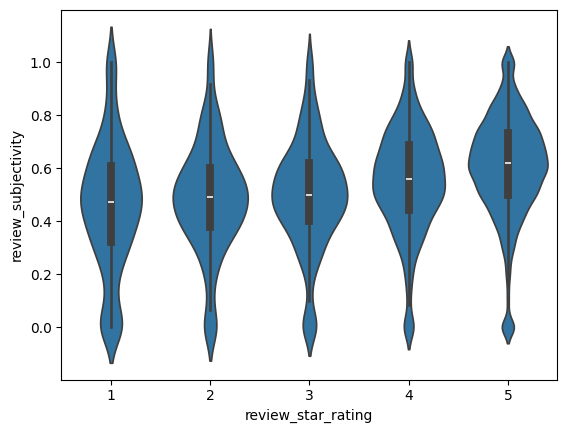

In [28]:
sns.violinplot(
    data=reviews,
    x='review_star_rating',
    y='review_subjectivity'
)

<Axes: xlabel='review_star_rating', ylabel='review_polarity'>

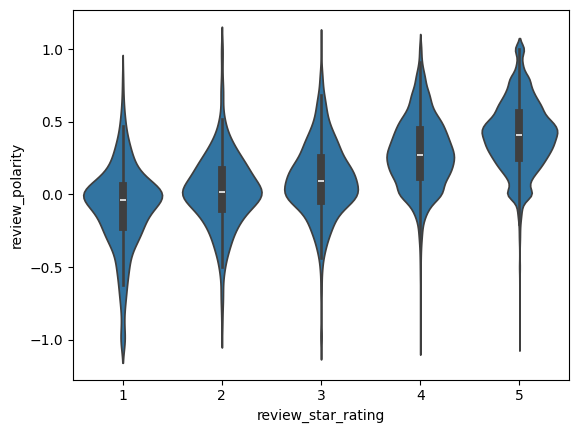

In [29]:
sns.violinplot(
    data=reviews,
    x='review_star_rating',
    y='review_polarity'
)

In [30]:
products

,url,product_title,product_details,product_specs,product_price,total_star_rating,total_star_votes
0,https://www.target.com/p/apple-iphone-14/-/A-8...,Apple iPhone 14,Highlights\n6.1-inch Super Retina XDR display¹...,NaN,Price Varies,4.4,476 star ratings
1,https://www.target.com/p/samsung-galaxy-s22-ul...,Samsung Galaxy S22 Ultra 5G Unlocked (128GB) S...,Highlights\n8K video - the highest resolution ...,NaN,"$1,199.99",4.6,8016 star ratings
2,https://www.target.com/p/hp-deskjet-2755e-wire...,HP DeskJet 2755e Wireless All-In-One Color Pri...,Highlights\nBest for home printing\nAll-in-one...,NaN,$49.99,3.8,1648 star ratings
3,https://www.target.com/p/dyson-ball-animal-3-e...,Dyson Ball Animal 3 Extra Upright Vacuum,Highlights\nThe best cleaning performance of a...,NaN,See price in cart,4.2,154 star ratings
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
products = products[~products['url'].isna()]
products

,url,product_title,product_details,product_specs,product_price,total_star_rating,total_star_votes
0,https://www.target.com/p/apple-iphone-14/-/A-8...,Apple iPhone 14,Highlights\n6.1-inch Super Retina XDR display¹...,NaN,Price Varies,4.4,476 star ratings
1,https://www.target.com/p/samsung-galaxy-s22-ul...,Samsung Galaxy S22 Ultra 5G Unlocked (128GB) S...,Highlights\n8K video - the highest resolution ...,NaN,"$1,199.99",4.6,8016 star ratings
2,https://www.target.com/p/hp-deskjet-2755e-wire...,HP DeskJet 2755e Wireless All-In-One Color Pri...,Highlights\nBest for home printing\nAll-in-one...,NaN,$49.99,3.8,1648 star ratings
3,https://www.target.com/p/dyson-ball-animal-3-e...,Dyson Ball Animal 3 Extra Upright Vacuum,Highlights\nThe best cleaning performance of a...,NaN,See price in cart,4.2,154 star ratings
0,https://www.target.com/p/jbl-charge-5-portable...,JBL Charge 5 Portable Bluetooth Waterproof Spe...,Highlights\nTarget Certified Refurbished speak...,NaN,$107.99,5.0,2 star ratings
1,https://www.target.com/p/microsoft-365-persona...,Microsoft 365 Personal 12-Month Subscription (...,Highlights\nFor one person\nUse on Windows PCs...,NaN,$69.99,3.0,26 star ratings
2,https://www.target.com/p/turbotax-2023-deluxe-...,TurboTax 2023 Deluxe Federal and State Tax Sof...,Highlights\nTurboTax® Deluxe Federal + State h...,NaN,$69.99,4.3,12983 star ratings
3,https://www.target.com/p/hamilton-beach-4-slic...,Hamilton Beach 4 slice Toaster 24782,Highlights\nEVENLY TOASTS BOTH SIDES OF SINGLE...,NaN,$59.99,NaN,NaN
4,https://www.target.com/p/razor-24v-mx350-dirt-...,Razor 24V MX350 Dirt Rocket Electric Powered R...,Highlights\nAuthentic motocross frame geometry...,NaN,$329.99,4.1,431 star ratings
5,https://www.target.com/p/lg-65-34-class-4k-uhd...,"LG 65"" Class 4K UHD 2160p Smart OLED TV - OLED...",Highlights\nBrighter picture powered by Bright...,NaN,"$1,599.99",4.7,668 star ratings


In [32]:
products = products.reset_index()

In [33]:
products = products.drop(['index'],axis=1)

In [34]:
products

,url,product_title,product_details,product_specs,product_price,total_star_rating,total_star_votes
0,https://www.target.com/p/apple-iphone-14/-/A-8...,Apple iPhone 14,Highlights\n6.1-inch Super Retina XDR display¹...,NaN,Price Varies,4.4,476 star ratings
1,https://www.target.com/p/samsung-galaxy-s22-ul...,Samsung Galaxy S22 Ultra 5G Unlocked (128GB) S...,Highlights\n8K video - the highest resolution ...,NaN,"$1,199.99",4.6,8016 star ratings
2,https://www.target.com/p/hp-deskjet-2755e-wire...,HP DeskJet 2755e Wireless All-In-One Color Pri...,Highlights\nBest for home printing\nAll-in-one...,NaN,$49.99,3.8,1648 star ratings
3,https://www.target.com/p/dyson-ball-animal-3-e...,Dyson Ball Animal 3 Extra Upright Vacuum,Highlights\nThe best cleaning performance of a...,NaN,See price in cart,4.2,154 star ratings
4,https://www.target.com/p/jbl-charge-5-portable...,JBL Charge 5 Portable Bluetooth Waterproof Spe...,Highlights\nTarget Certified Refurbished speak...,NaN,$107.99,5.0,2 star ratings
5,https://www.target.com/p/microsoft-365-persona...,Microsoft 365 Personal 12-Month Subscription (...,Highlights\nFor one person\nUse on Windows PCs...,NaN,$69.99,3.0,26 star ratings
6,https://www.target.com/p/turbotax-2023-deluxe-...,TurboTax 2023 Deluxe Federal and State Tax Sof...,Highlights\nTurboTax® Deluxe Federal + State h...,NaN,$69.99,4.3,12983 star ratings
7,https://www.target.com/p/hamilton-beach-4-slic...,Hamilton Beach 4 slice Toaster 24782,Highlights\nEVENLY TOASTS BOTH SIDES OF SINGLE...,NaN,$59.99,NaN,NaN
8,https://www.target.com/p/razor-24v-mx350-dirt-...,Razor 24V MX350 Dirt Rocket Electric Powered R...,Highlights\nAuthentic motocross frame geometry...,NaN,$329.99,4.1,431 star ratings
9,https://www.target.com/p/lg-65-34-class-4k-uhd...,"LG 65"" Class 4K UHD 2160p Smart OLED TV - OLED...",Highlights\nBrighter picture powered by Bright...,NaN,"$1,599.99",4.7,668 star ratings


In [35]:
textblob.TextBlob(products.loc[0,'product_details']).sentiment

Sentiment(polarity=0.27230392156862754, subjectivity=0.4428921568627451)

In [36]:
products['prod_subjectivity'] = products.apply(
    lambda row: textblob.TextBlob(str(row['product_details'])).subjectivity,axis=1
)

In [37]:
products

,url,product_title,product_details,product_specs,product_price,total_star_rating,total_star_votes,prod_subjectivity
0,https://www.target.com/p/apple-iphone-14/-/A-8...,Apple iPhone 14,Highlights\n6.1-inch Super Retina XDR display¹...,NaN,Price Varies,4.4,476 star ratings,0.442892
1,https://www.target.com/p/samsung-galaxy-s22-ul...,Samsung Galaxy S22 Ultra 5G Unlocked (128GB) S...,Highlights\n8K video - the highest resolution ...,NaN,"$1,199.99",4.6,8016 star ratings,0.501054
2,https://www.target.com/p/hp-deskjet-2755e-wire...,HP DeskJet 2755e Wireless All-In-One Color Pri...,Highlights\nBest for home printing\nAll-in-one...,NaN,$49.99,3.8,1648 star ratings,0.611204
3,https://www.target.com/p/dyson-ball-animal-3-e...,Dyson Ball Animal 3 Extra Upright Vacuum,Highlights\nThe best cleaning performance of a...,NaN,See price in cart,4.2,154 star ratings,0.478697
4,https://www.target.com/p/jbl-charge-5-portable...,JBL Charge 5 Portable Bluetooth Waterproof Spe...,Highlights\nTarget Certified Refurbished speak...,NaN,$107.99,5.0,2 star ratings,0.363788
5,https://www.target.com/p/microsoft-365-persona...,Microsoft 365 Personal 12-Month Subscription (...,Highlights\nFor one person\nUse on Windows PCs...,NaN,$69.99,3.0,26 star ratings,0.497451
6,https://www.target.com/p/turbotax-2023-deluxe-...,TurboTax 2023 Deluxe Federal and State Tax Sof...,Highlights\nTurboTax® Deluxe Federal + State h...,NaN,$69.99,4.3,12983 star ratings,0.669892
7,https://www.target.com/p/hamilton-beach-4-slic...,Hamilton Beach 4 slice Toaster 24782,Highlights\nEVENLY TOASTS BOTH SIDES OF SINGLE...,NaN,$59.99,NaN,NaN,0.454891
8,https://www.target.com/p/razor-24v-mx350-dirt-...,Razor 24V MX350 Dirt Rocket Electric Powered R...,Highlights\nAuthentic motocross frame geometry...,NaN,$329.99,4.1,431 star ratings,0.617361
9,https://www.target.com/p/lg-65-34-class-4k-uhd...,"LG 65"" Class 4K UHD 2160p Smart OLED TV - OLED...",Highlights\nBrighter picture powered by Bright...,NaN,"$1,599.99",4.7,668 star ratings,0.456981


In [38]:
products.loc[12,'product_details'] = ""
products['total_star_votes'] = np.select(
    [products['total_star_votes'].isna(),~products['total_star_votes'].isna()],
    ["0",products['total_star_votes']]
)
products['total_star_votes'] = products['total_star_votes'].str.replace(pat=r' |[A-Za-z]',repl='',regex=True).astype(int)
products

,url,product_title,product_details,product_specs,product_price,total_star_rating,total_star_votes,prod_subjectivity
0,https://www.target.com/p/apple-iphone-14/-/A-8...,Apple iPhone 14,Highlights\n6.1-inch Super Retina XDR display¹...,NaN,Price Varies,4.4,476,0.442892
1,https://www.target.com/p/samsung-galaxy-s22-ul...,Samsung Galaxy S22 Ultra 5G Unlocked (128GB) S...,Highlights\n8K video - the highest resolution ...,NaN,"$1,199.99",4.6,8016,0.501054
2,https://www.target.com/p/hp-deskjet-2755e-wire...,HP DeskJet 2755e Wireless All-In-One Color Pri...,Highlights\nBest for home printing\nAll-in-one...,NaN,$49.99,3.8,1648,0.611204
3,https://www.target.com/p/dyson-ball-animal-3-e...,Dyson Ball Animal 3 Extra Upright Vacuum,Highlights\nThe best cleaning performance of a...,NaN,See price in cart,4.2,154,0.478697
4,https://www.target.com/p/jbl-charge-5-portable...,JBL Charge 5 Portable Bluetooth Waterproof Spe...,Highlights\nTarget Certified Refurbished speak...,NaN,$107.99,5.0,2,0.363788
5,https://www.target.com/p/microsoft-365-persona...,Microsoft 365 Personal 12-Month Subscription (...,Highlights\nFor one person\nUse on Windows PCs...,NaN,$69.99,3.0,26,0.497451
6,https://www.target.com/p/turbotax-2023-deluxe-...,TurboTax 2023 Deluxe Federal and State Tax Sof...,Highlights\nTurboTax® Deluxe Federal + State h...,NaN,$69.99,4.3,12983,0.669892
7,https://www.target.com/p/hamilton-beach-4-slic...,Hamilton Beach 4 slice Toaster 24782,Highlights\nEVENLY TOASTS BOTH SIDES OF SINGLE...,NaN,$59.99,NaN,0,0.454891
8,https://www.target.com/p/razor-24v-mx350-dirt-...,Razor 24V MX350 Dirt Rocket Electric Powered R...,Highlights\nAuthentic motocross frame geometry...,NaN,$329.99,4.1,431,0.617361
9,https://www.target.com/p/lg-65-34-class-4k-uhd...,"LG 65"" Class 4K UHD 2160p Smart OLED TV - OLED...",Highlights\nBrighter picture powered by Bright...,NaN,"$1,599.99",4.7,668,0.456981


In [39]:
products['productID'] = products.apply(
    lambda row: data_coll_prod[data_coll_prod['URL']==row['url']].iloc[0]['productID'].astype(int),axis=1
)
products['prodSiteID'] = products.apply(
    lambda row: data_coll_prod[data_coll_prod['URL']==row['url']].iloc[0]['prodSiteID'],axis=1
)
products

,url,product_title,product_details,product_specs,product_price,total_star_rating,total_star_votes,prod_subjectivity,productID,prodSiteID
0,https://www.target.com/p/apple-iphone-14/-/A-8...,Apple iPhone 14,Highlights\n6.1-inch Super Retina XDR display¹...,NaN,Price Varies,4.4,476,0.442892,1,target1
1,https://www.target.com/p/samsung-galaxy-s22-ul...,Samsung Galaxy S22 Ultra 5G Unlocked (128GB) S...,Highlights\n8K video - the highest resolution ...,NaN,"$1,199.99",4.6,8016,0.501054,2,target2
2,https://www.target.com/p/hp-deskjet-2755e-wire...,HP DeskJet 2755e Wireless All-In-One Color Pri...,Highlights\nBest for home printing\nAll-in-one...,NaN,$49.99,3.8,1648,0.611204,3,target3
3,https://www.target.com/p/dyson-ball-animal-3-e...,Dyson Ball Animal 3 Extra Upright Vacuum,Highlights\nThe best cleaning performance of a...,NaN,See price in cart,4.2,154,0.478697,20,target20
4,https://www.target.com/p/jbl-charge-5-portable...,JBL Charge 5 Portable Bluetooth Waterproof Spe...,Highlights\nTarget Certified Refurbished speak...,NaN,$107.99,5.0,2,0.363788,4,target4
5,https://www.target.com/p/microsoft-365-persona...,Microsoft 365 Personal 12-Month Subscription (...,Highlights\nFor one person\nUse on Windows PCs...,NaN,$69.99,3.0,26,0.497451,5,target5
6,https://www.target.com/p/turbotax-2023-deluxe-...,TurboTax 2023 Deluxe Federal and State Tax Sof...,Highlights\nTurboTax® Deluxe Federal + State h...,NaN,$69.99,4.3,12983,0.669892,6,target6
7,https://www.target.com/p/hamilton-beach-4-slic...,Hamilton Beach 4 slice Toaster 24782,Highlights\nEVENLY TOASTS BOTH SIDES OF SINGLE...,NaN,$59.99,NaN,0,0.454891,7,target7
8,https://www.target.com/p/razor-24v-mx350-dirt-...,Razor 24V MX350 Dirt Rocket Electric Powered R...,Highlights\nAuthentic motocross frame geometry...,NaN,$329.99,4.1,431,0.617361,8,target8
9,https://www.target.com/p/lg-65-34-class-4k-uhd...,"LG 65"" Class 4K UHD 2160p Smart OLED TV - OLED...",Highlights\nBrighter picture powered by Bright...,NaN,"$1,599.99",4.7,668,0.456981,9,target9


In [40]:
# products.to_csv('../data/target_products_master.csv')
# reviews.to_csv('../data/target_reviews_master.csv')

In [41]:
products = pd.read_csv('../data/target_products_unclean1.csv')
products['prod_subjectivity'] = products.apply(
    lambda row: textblob.TextBlob(str(row['product_details'])).subjectivity,axis=1
)
products['productID'] = products.apply(
    lambda row: data_coll_prod[data_coll_prod['URL']==row['url']].iloc[0]['productID'].astype(int),axis=1
)
products['prodSiteID'] = products.apply(
    lambda row: data_coll_prod[data_coll_prod['URL']==row['url']].iloc[0]['prodSiteID'],axis=1
)
products['total_star_votes'] = np.select(
    [products['total_star_votes'].isna(),~products['total_star_votes'].isna()],
    ["0",products['total_star_votes']]
)
products['total_star_votes'] = products['total_star_votes'].str.replace(pat=r' |[A-Za-z]',repl='',regex=True).astype(int)

products['product_price'] = products['product_price'].str.replace('\$|,','',regex=True)
products.loc[0,'product_price'] = 0
products['product_price'] = products['product_price'].astype(float)
#display(products,products.columns)
products[['productID', 'prodSiteID', 'url', 'product_title', 'product_details', 'product_specs',
       'product_price', 'total_star_rating', 'total_star_votes',
       'prod_subjectivity']]

,productID,prodSiteID,url,product_title,product_details,product_specs,product_price,total_star_rating,total_star_votes,prod_subjectivity
0,1,target1,https://www.target.com/p/apple-iphone-14/-/A-8...,Apple iPhone 14,Highlights\n6.1-inch Super Retina XDR display¹...,NaN,0.00,4.4,476,0.442892
1,2,target2,https://www.target.com/p/samsung-galaxy-s22-ul...,Samsung Galaxy S22 Ultra 5G Unlocked (128GB) S...,Highlights\n8K video - the highest resolution ...,Dimensions (Overall): 6.43 Inches (H) x 3.06 I...,1199.99,4.6,8016,0.501054
2,3,target3,https://www.target.com/p/hp-deskjet-2755e-wire...,HP DeskJet 2755e Wireless All-In-One Color Pri...,Highlights\nBest for home printing\nAll-in-one...,Dimensions (Overall): 6.06 Inches (H) x 16.7 I...,49.99,3.8,1648,0.611204
3,4,target4,https://www.target.com/p/jbl-charge-5-portable...,JBL Charge 5 Portable Bluetooth Waterproof Spe...,Highlights\nTarget Certified Refurbished speak...,Dimensions (Overall): 3.76 Inches (H) x 3.67 I...,107.99,5.0,2,0.363788
4,5,target5,https://www.target.com/p/microsoft-365-persona...,Microsoft 365 Personal 12-Month Subscription (...,Highlights\nFor one person\nUse on Windows PCs...,Video Game Genre: Home/Office Software\nFormat...,69.99,3.0,26,0.497451
5,6,target6,https://www.target.com/p/turbotax-2023-deluxe-...,TurboTax 2023 Deluxe Federal and State Tax Sof...,Highlights\nTurboTax® Deluxe Federal + State h...,Video Game Genre: Tax Preparational Software\n...,69.99,4.3,12983,0.669892
6,7,target7,https://www.target.com/p/hamilton-beach-4-slic...,Hamilton Beach 4 slice Toaster 24782,Highlights\nEVENLY TOASTS BOTH SIDES OF SINGLE...,Dimensions (Overall): 7.6 Inches (H) x 11 Inch...,59.99,NaN,0,0.456078
7,8,target8,https://www.target.com/p/razor-24v-mx350-dirt-...,Razor 24V MX350 Dirt Rocket Electric Powered R...,Highlights\nAuthentic motocross frame geometry...,Dimensions (Overall): 28.0 Inches (H) x 24.0 I...,329.99,4.1,431,0.617361
8,9,target9,https://www.target.com/p/lg-65-34-class-4k-uhd...,"LG 65"" Class 4K UHD 2160p Smart OLED TV - OLED...",Highlights\nBrighter picture powered by Bright...,Dimensions (Overall): 32.5 Inches (H) x 56.7 I...,1599.99,4.7,668,0.456981
9,10,target10,https://www.target.com/p/ge-jes1460dsbb-1-4-cu...,GE JES1460DSBB 1.4 Cu. Ft. Black Counter Top M...,"Highlights\n1.4 Cu. Ft. Capacity, 1100W Of Pow...",Dimensions (Overall): 14.0 inches (H) x 18.0 i...,190.10,4.4,3083,0.442290


In [47]:
products.to_csv('../data/target_products_master.csv')

In [53]:
#reviews = pd.DataFrame(reviews[reviews['review_lang']=='en'])
reviews['review_length'] = reviews['review_content'].str.len()
reviews.to_csv('../data/target_reviews_clean.csv')

In [59]:
reviews['prod_subjectivity'] = reviews.apply(
    lambda row: products[products['url']==row['url']].iloc[0]['prod_subjectivity'],axis=1
)
reviews['product_price'] = reviews.apply(
    lambda row: products[products['url']==row['url']].iloc[0]['product_price'],axis=1
)
reviews

,url,review_header,reviewer_name,review_content,review_star_rating,review_helpful_votes,verified_purchaser,productID,prodSiteID,review_lang,review_polarity,review_subjectivity,review_length,prod_subjectivity,product_price
0,https://www.target.com/p/apple-iphone-14/-/A-8...,Help with the nightmare situation.,J Fosko,When I got the phone we did not want the phone...,3,0,0,1.0,target1,en,0.375000,0.750000,104,0.442892,0.00
1,https://www.target.com/p/apple-iphone-14/-/A-8...,Loving it!,Nanner74,I am new to iPhones but I am loving the easy u...,5,0,0,1.0,target1,en,0.403283,0.714646,218,0.442892,0.00
2,https://www.target.com/p/apple-iphone-14/-/A-8...,Nice phone,Brandi R,My daughter really likes her new phone.,5,0,0,1.0,target1,en,0.312121,0.551515,39,0.442892,0.00
3,https://www.target.com/p/apple-iphone-14/-/A-8...,Apple Iphone 14 purchase,Larry Justin,The Apple Iphone 14 is well worth the price. E...,5,0,0,1.0,target1,en,0.242424,0.396970,83,0.442892,0.00
4,https://www.target.com/p/apple-iphone-14/-/A-8...,Happy,Momo3boys,It’s pretty good no different then the 13,5,0,0,1.0,target1,en,0.437500,0.800000,41,0.442892,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14807,https://www.target.com/p/igloo-imx-24qt-cooler...,"Nice cooler for the price,",Eric S.,"Nice cooler for the price, keeps my goodies ni...",5,0,0,19.0,target19,en,0.300000,1.000000,66,0.574359,94.99
14808,https://www.target.com/p/igloo-imx-24qt-cooler...,Awesome IMX,NaN,I purchased this cooler thinking if it didn’t ...,5,0,0,19.0,target19,en,0.254861,0.700694,550,0.574359,94.99
14809,https://www.target.com/p/igloo-imx-24qt-cooler...,Great cooler,NaN,This cooler works amazing! Only downfall is it...,4,0,0,19.0,target19,en,0.340625,0.787500,125,0.574359,94.99
14810,https://www.target.com/p/igloo-imx-24qt-cooler...,Great cooler,NaN,I’ll put this cooler up against any of those h...,5,0,0,19.0,target19,en,0.410000,0.381667,245,0.574359,94.99


<Axes: xlabel='product_price', ylabel='review_subjectivity'>

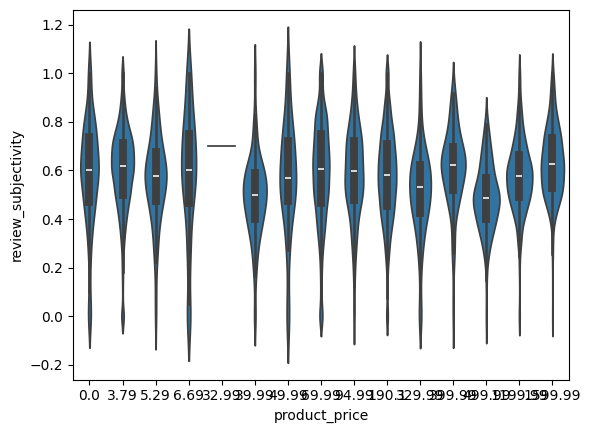

In [63]:
sns.violinplot(
    data=reviews,x='product_price',y='review_subjectivity'
)

<Axes: xlabel='review_subjectivity', ylabel='prod_subjectivity'>

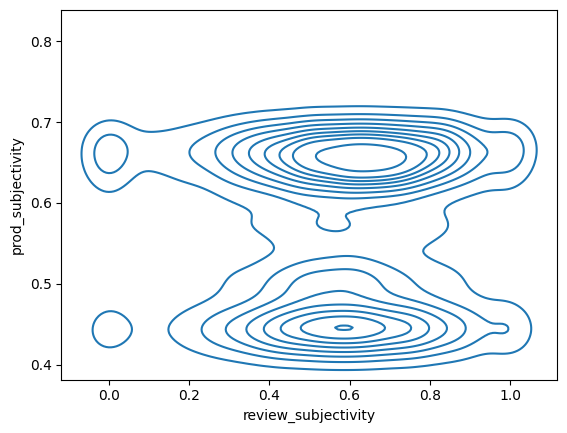

In [68]:
sns.kdeplot(
    data=reviews,x='review_subjectivity',y='prod_subjectivity'
)

<Axes: xlabel='review_subjectivity'>

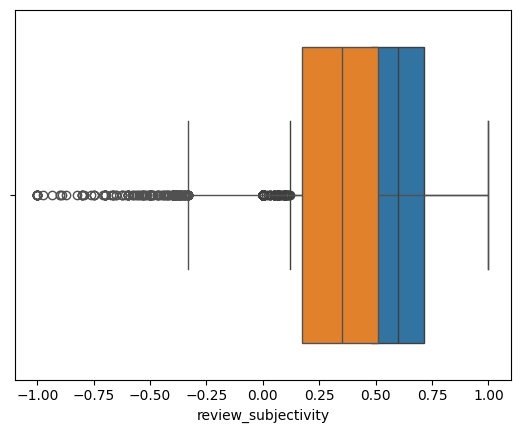

In [72]:
sns.boxplot(
    data=reviews,
    x='review_subjectivity'
)


<Axes: xlabel='review_polarity'>

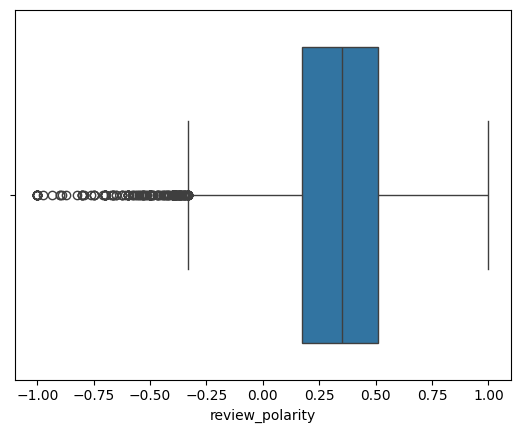

In [73]:
sns.boxplot(
    data=reviews,
    x='review_polarity'    
)

In [85]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

from nltk import tokenize

results = []

reviews['nltk_comp_sent'] = 0

for i,row in reviews.iterrows():
    sid = SentimentIntensityAnalyzer()
    #print(row['review_content'])
    ss = sid.polarity_scores(row['review_content'])
    # for k in sorted(ss):
    #     print('{0}: {1}, '.format(k, ss[k]), end='')
    reviews.loc[i,'nltk_comp_sent'] = ss['compound']

reviews

,url,review_header,reviewer_name,review_content,review_star_rating,review_helpful_votes,verified_purchaser,productID,prodSiteID,review_lang,review_polarity,review_subjectivity,review_length,prod_subjectivity,product_price,nltk_comp_sent
0,https://www.target.com/p/apple-iphone-14/-/A-8...,Help with the nightmare situation.,J Fosko,When I got the phone we did not want the phone...,3,0,0,1.0,target1,en,0.375000,0.750000,104,0.442892,0.00,0.2681
1,https://www.target.com/p/apple-iphone-14/-/A-8...,Loving it!,Nanner74,I am new to iPhones but I am loving the easy u...,5,0,0,1.0,target1,en,0.403283,0.714646,218,0.442892,0.00,0.9676
2,https://www.target.com/p/apple-iphone-14/-/A-8...,Nice phone,Brandi R,My daughter really likes her new phone.,5,0,0,1.0,target1,en,0.312121,0.551515,39,0.442892,0.00,0.4754
3,https://www.target.com/p/apple-iphone-14/-/A-8...,Apple Iphone 14 purchase,Larry Justin,The Apple Iphone 14 is well worth the price. E...,5,0,0,1.0,target1,en,0.242424,0.396970,83,0.442892,0.00,0.7096
4,https://www.target.com/p/apple-iphone-14/-/A-8...,Happy,Momo3boys,It’s pretty good no different then the 13,5,0,0,1.0,target1,en,0.437500,0.800000,41,0.442892,0.00,0.5994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14807,https://www.target.com/p/igloo-imx-24qt-cooler...,"Nice cooler for the price,",Eric S.,"Nice cooler for the price, keeps my goodies ni...",5,0,0,19.0,target19,en,0.300000,1.000000,66,0.574359,94.99,0.6808
14808,https://www.target.com/p/igloo-imx-24qt-cooler...,Awesome IMX,NaN,I purchased this cooler thinking if it didn’t ...,5,0,0,19.0,target19,en,0.254861,0.700694,550,0.574359,94.99,0.9617
14809,https://www.target.com/p/igloo-imx-24qt-cooler...,Great cooler,NaN,This cooler works amazing! Only downfall is it...,4,0,0,19.0,target19,en,0.340625,0.787500,125,0.574359,94.99,-0.1007
14810,https://www.target.com/p/igloo-imx-24qt-cooler...,Great cooler,NaN,I’ll put this cooler up against any of those h...,5,0,0,19.0,target19,en,0.410000,0.381667,245,0.574359,94.99,0.8555


from nltk.sentiment.vader import SentimentIntensityAnalyzer

>>> from nltk.classify import NaiveBayesClassifier
>>> from nltk.corpus import subjectivity
>>> from nltk.sentiment import SentimentAnalyzer
>>> from nltk.sentiment.util import *

from nltk import tokenize

>>> lines_list = tokenize.sent_tokenize(paragraph)
>>> sentences.extend(lines_list)

for sentence in sentences:
...     sid = SentimentIntensityAnalyzer()
...     print(sentence)
...     ss = sid.polarity_scores(sentence)
...     for k in sorted(ss):
...         print('{0}: {1}, '.format(k, ss[k]), end='')
...     print()